In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

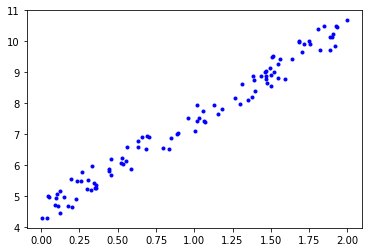

In [3]:
plt.plot(X,y,'b.')

In [4]:
X_b = np.c_[np.ones((100,1)),X]
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
best_theta

array([[4.48455462],
       [3.01343297]])

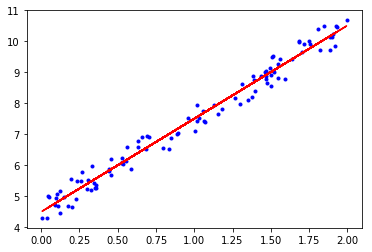

In [6]:
plt.plot(X,y,'b.')
plt.plot(X,X_b @ best_theta,'r-')

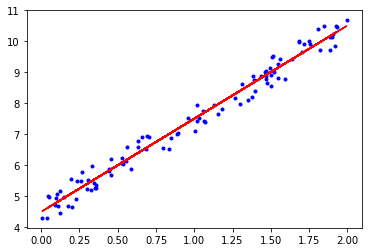

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
plt.plot(X,y,'b.')
plt.plot(X,lin_reg.predict(X),'r-')

In [8]:
lin_reg.intercept_,lin_reg.coef_

(array([4.48455462]), array([[3.01343297]]))

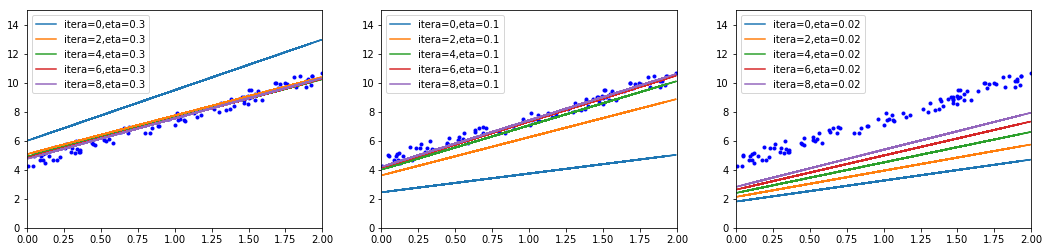

In [9]:
thetas_on_eta = {}
fig = plt.figure(figsize=(18,4))
for i,eta in enumerate([0.3,0.1,0.02]):
    ax = fig.add_subplot(1,3,i+1)
#     eta = 0.1
    n_iterations = 1000
    m = X_b.shape[0]
    theta = np.random.randn(2,1)
    thetas = theta
    ax.plot(X,y,'b.')
    plt.axis([0,2,0,15])
    for itera in range(n_iterations):
        thetas = np.c_[thetas,theta]
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients

        if itera in range(0,10,2):
            ax.plot(X,X_b @ theta,'-',label='itera=%s,eta=%s' % (itera,eta))
    thetas_on_eta[eta] = thetas
    plt.legend()

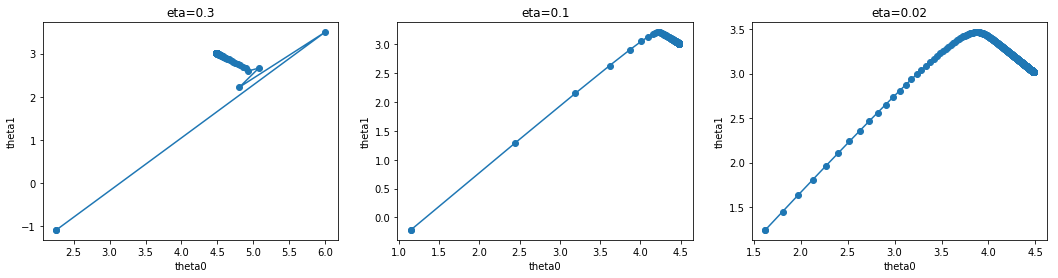

In [10]:
fig = plt.figure(figsize=(18,4))
i = 1
for eta,thetas_xy in thetas_on_eta.items(): # 不同学习率下批量梯度下降
    fig.add_subplot(1,3,i)
    plt.plot(thetas_xy[0],thetas_xy[1],'-o')
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.title('eta=%s' % eta)
    i += 1

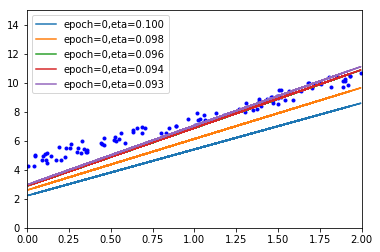

In [11]:
n_epochs = 50
t0 = 5; t1 = 50
m = X_b.shape[0]
def learning_schedule(t):
    return t0/(t+t1)
eta = 0.2
theta = np.random.randn(2,1)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

thetas = theta

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        X_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * X_i.T @ (X_i @ theta - y_i)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if epoch * m + i in range(5) :
            plt.plot(X,X_b @ theta,'-',label='epoch=%s,eta=%.3f' % (epoch,eta))
        thetas = np.c_[thetas,theta]
    plt.legend()

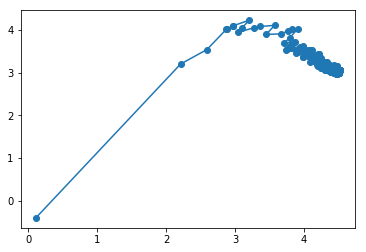

In [12]:
plt.plot(thetas[0],thetas[1],'-o') # 随机梯度下降